## Testing of field curvature
### Imaging setup:
- Lens: Lensagon 1.2x
- Camera: Photometrix Iris 15
- Test sample: Ronchi grating (e.g. 40 lp/mm from Thorlabs) imaged at fixed focus position, manually aligned.
- Illumination: even background using a smartphone screen (all white)

MTF is accessed across field of view via local contrast metric.

Inspired by Roger Cicala's [blog post](https://www.lensrentals.com/blog/2018/06/developing-a-rapid-mtf-test-for-photo-and-video-lenses/).

This code is exploratory, not meant for streamlined processing.

- Author: Nikita Vladimirov 
- License: GPL-3.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tifffile as tif
import glob, os
from pathlib import Path

### Explore single TIFF image of a Ronchi grid

In [88]:
datafolder = "D:\\benchtopData\\Lens-testing"
datafiles = {"Lensagon 1.2x": datafolder + "\\Lensagon1.2x\\ronchi-40lp-rot1.5deg-Lensagon1.2x\\ronchi-40lp-rot1.5deg-Lensagon1.2x-rep1(bright).tif"}

In [90]:
img = tif.imread(datafiles["Lensagon 1.2x"])
im_h, im_w = img.shape
print(im_h, im_w)
print(f"Aspect ratio {im_w/im_h}")

5056 2960
Aspect ratio 0.5854430379746836


In [91]:
# The number of ROIs to divide image along each axis
N_ROIs_H, N_ROIs_W = 32, 20 #these give integer number of rois along each axis, with aspect ratio close to the sensor ratio
roi_h, roi_w = int(im_h/N_ROIs_H), int(im_w/N_ROIs_W)
print(roi_h, roi_w)

158 148


Text(0.5, 1.0, 'ROI(0,0), top left corner')

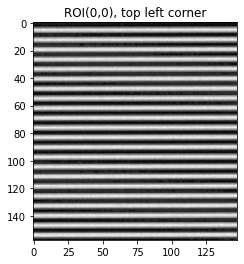

In [92]:
plt.imshow(img[:roi_h,:roi_w], cmap='gray')
plt.title("ROI(0,0), top left corner")

In [93]:
def contrast(roi):
    """Compute the contrast value, (max-min)/(max+min), from the image roi"""
    mini = np.percentile(roi, 1)
    maxi = np.percentile(roi, 99)
    contrast = (maxi - mini) / (maxi + mini)
    return contrast

In [97]:
contrast_table = np.empty((N_ROIs_H, N_ROIs_W))
for j in range(N_ROIs_H):
    for i in range(N_ROIs_W):
        roi = img[j*roi_h:(j+1)*roi_h, i*roi_w:(i+1)*roi_w]
        contrast_table[j,i] = contrast(roi)

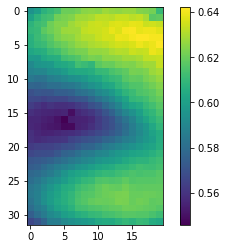

In [98]:
plt.imshow(contrast_table)
plt.colorbar()

## Explore all single TIFF files for this lens

### Ronchi 40 lp/mm grating

In [117]:
file_list = []
for file in glob.glob(datafolder + "\\Lensagon1.2x\\ronchi-40lp-rot1.5deg-Lensagon1.2x\\" + "*.tif"):
    file_list.append(file)
    print(file)

D:\benchtopData\Lens-testing\Lensagon1.2x\ronchi-40lp-rot1.5deg-Lensagon1.2x\20220113-123651.tif
D:\benchtopData\Lens-testing\Lensagon1.2x\ronchi-40lp-rot1.5deg-Lensagon1.2x\20220113-123711.tif
D:\benchtopData\Lens-testing\Lensagon1.2x\ronchi-40lp-rot1.5deg-Lensagon1.2x\ronchi-40lp-rot1.5deg-Lensagon1.2x-rep1(bright).tif
D:\benchtopData\Lens-testing\Lensagon1.2x\ronchi-40lp-rot1.5deg-Lensagon1.2x\ronchi-40lp-rot1.5deg-Lensagon1.2x-rep1(dimmer).tif
D:\benchtopData\Lens-testing\Lensagon1.2x\ronchi-40lp-rot1.5deg-Lensagon1.2x\ronchi-40lp-rot1.5deg-Lensagon1.2x.tif


In [118]:
def contrast_tables_from_file_list(file_list):
    "Compute contrast tables from list of TIFF files in 'file_list' (abs path)"
    contrast_tables = np.empty((len(file_list), N_ROIs_H, N_ROIs_W))
    for ifile, file in enumerate(file_list):
        img = tif.imread(file_list[ifile])
        im_h, im_w = img.shape
        print(f"loaded image size {im_h}x{im_w}")
        roi_h, roi_w = int(im_h/N_ROIs_H), int(im_w/N_ROIs_W)
        for j in range(N_ROIs_H):
            for i in range(N_ROIs_W):
                roi = img[j*roi_h:(j+1)*roi_h, i*roi_w:(i+1)*roi_w]
                contrast_tables[ifile,j,i] = contrast(roi)
    return contrast_tables

contrast_tables = contrast_tables_from_file_list(file_list)

loaded image size 5056x2960
loaded image size 5056x2960
loaded image size 5056x2960
loaded image size 5056x2960
loaded image size 5056x2960


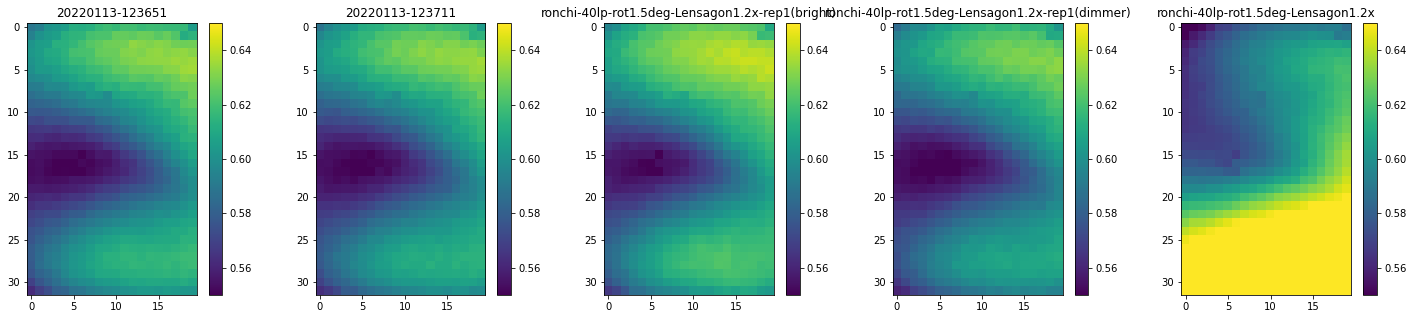

In [119]:
fig = plt.figure(figsize=(25, 5))
cmin, cmax = (0.55, 0.65)
for ifile in range(len(file_list)):
    ax = plt.subplot(1, len(file_list), ifile+1)
    conmap = ax.imshow(contrast_tables[ifile,:,:], vmin=cmin, vmax=cmax)
    ax.set_title(Path(file_list[ifile]).stem)
    plt.colorbar(conmap,ax=ax)

The last plot saturated, because the Ronchi grating was too tilted in the up-down direction. 

Other plots agree with each other, there is some left/right tilt, and some field curvature visible.

### Ronchi 80 lp/mm grating

In [121]:
file_list = []
for file in glob.glob(datafolder + "\\Lensagon1.2x\\ronchi-80lp-rot1.5deg-Lensagon1.2x\\" + "*.tif"):
    file_list.append(file)
    print(file)

D:\benchtopData\Lens-testing\Lensagon1.2x\ronchi-80lp-rot1.5deg-Lensagon1.2x\20220113-125022.tif
D:\benchtopData\Lens-testing\Lensagon1.2x\ronchi-80lp-rot1.5deg-Lensagon1.2x\20220113-125024.tif
D:\benchtopData\Lens-testing\Lensagon1.2x\ronchi-80lp-rot1.5deg-Lensagon1.2x\20220113-125026.tif


In [122]:
contrast_tables = contrast_tables_from_file_list(file_list)

loaded image size 5056x2960
loaded image size 5056x2960
loaded image size 5056x2960


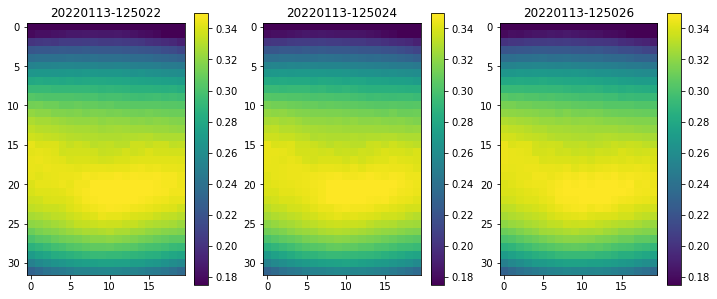

In [124]:
fig = plt.figure(figsize=(12, 5))
cmin, cmax = (0.175, 0.350)
for ifile in range(len(file_list)):
    ax = plt.subplot(1, len(file_list), ifile+1)
    conmap = ax.imshow(contrast_tables[ifile,:,:], vmin=cmin, vmax=cmax)
    ax.set_title(Path(file_list[ifile]).stem)
    plt.colorbar(conmap,ax=ax)

The tests with ronchi 80 lp/mm grating gives lower contrast than those with 40 lp/mm, and apparently less detailed 2D maps, with only vertical gradient visible.

### Next: comparison with Olympus MV-PLAPO 1x, at zoom 1.25x
- Grating: 40 lp/mm
- Camera: Hamamatsu Orcal Flash 4 (smaller chip)

In [131]:
N_ROIs_H, N_ROIs_W = 32, 32 #these give integer number of rois along each axis, with aspect ratio close to the sensor ratio

D:\benchtopData\Lens-testing\Olympus-MVPLAPO-1x\MVP1x-zoom1.25\ronchi40\20220113-153203.tif
D:\benchtopData\Lens-testing\Olympus-MVPLAPO-1x\MVP1x-zoom1.25\ronchi40\20220113-153354.tif
D:\benchtopData\Lens-testing\Olympus-MVPLAPO-1x\MVP1x-zoom1.25\ronchi40\20220113-153401.tif
loaded image size 2048x2048
loaded image size 2048x2048
loaded image size 2048x2048


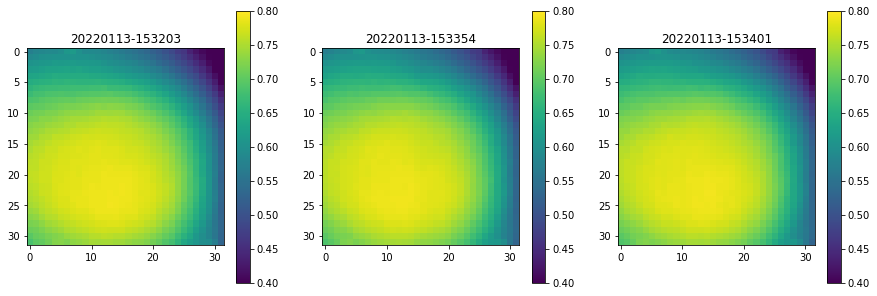

In [138]:
file_list = []
for file in glob.glob(datafolder + "\\Olympus-MVPLAPO-1x\\MVP1x-zoom1.25\\ronchi40\\" + "*.tif"):
    file_list.append(file)
    print(file)
    
contrast_tables = contrast_tables_from_file_list(file_list)

fig = plt.figure(figsize=(5*len(file_list), 5))
cmin, cmax = (0.40, 0.80)
for ifile in range(len(file_list)):
    ax = plt.subplot(1, len(file_list), ifile+1)
    conmap = ax.imshow(contrast_tables[ifile,:,:], vmin=cmin, vmax=cmax)
    ax.set_title(Path(file_list[ifile]).stem)
    plt.colorbar(conmap,ax=ax)

Note that contrast max values are higher and contrast range is wider for Olympus objective (0.40->0.80) compared to Lensagon objective (0.55->0.65). However, pixel size between Orca4 and Iris15 is also different (6.5 vs 4.25), so this is not a fair comparison for absolute contrast between the two lenses.

However, field curvature does seem to fall off rapidly in the corners.

### Ronchi 80 lp/mm

D:\benchtopData\Lens-testing\Olympus-MVPLAPO-1x\MVP1x-zoom1.25\ronchi80\20220113-153720.tif
D:\benchtopData\Lens-testing\Olympus-MVPLAPO-1x\MVP1x-zoom1.25\ronchi80\20220113-153723.tif
D:\benchtopData\Lens-testing\Olympus-MVPLAPO-1x\MVP1x-zoom1.25\ronchi80\20220113-153724.tif
loaded image size 2048x2048
loaded image size 2048x2048
loaded image size 2048x2048


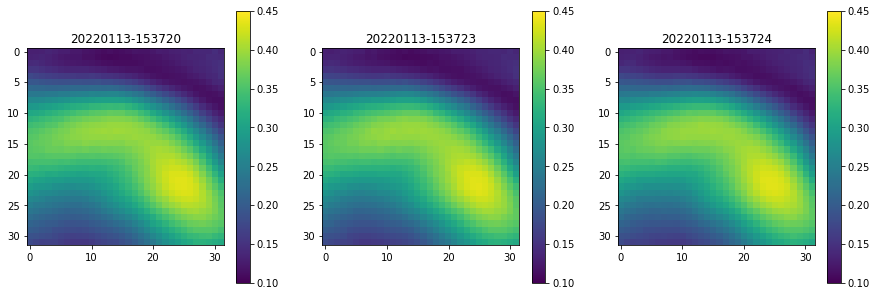

In [137]:
file_list = []
for file in glob.glob(datafolder + "\\Olympus-MVPLAPO-1x\\MVP1x-zoom1.25\\ronchi80\\" + "*.tif"):
    file_list.append(file)
    print(file)
    
contrast_tables = contrast_tables_from_file_list(file_list)

fig = plt.figure(figsize=(5*len(file_list), 5))
cmin, cmax = (0.10, 0.45)
for ifile in range(len(file_list)):
    ax = plt.subplot(1, len(file_list), ifile+1)
    conmap = ax.imshow(contrast_tables[ifile,:,:], vmin=cmin, vmax=cmax)
    ax.set_title(Path(file_list[ifile]).stem)
    plt.colorbar(conmap,ax=ax)

Note that only a ring segment has high contrast here (section of a field curvature sphere)

## Up next: imaging Ronchi gratings at stepped focus positions, and plotting field curvature in 3D.